In [1]:
import sampling as smp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

training = pd.read_msgpack('training.bin')
training.columns

Index(['subject', 'img', 'pixels', 'maskArea', 'maskC', 'maskS', 'maskV',
       'maskContour', 'hasmask', 'XYextents', 'maskW', 'maskH'],
      dtype='object')

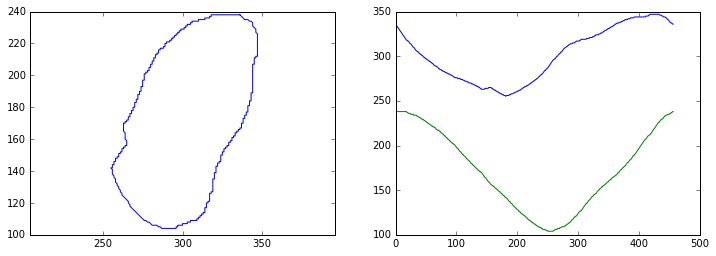

In [4]:
from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import ipywidgets as widgets

masks = training[training['hasmask']]
imask = masks.index

@interact(idx=IntSlider(min=0, max=len(masks)-1, continuous_update=False))
def plot_contour(idx):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    smp.plot_contour(masks.iloc[idx], ax[0])
    smp.plot_contour(masks.iloc[idx], ax[1], XY=True)



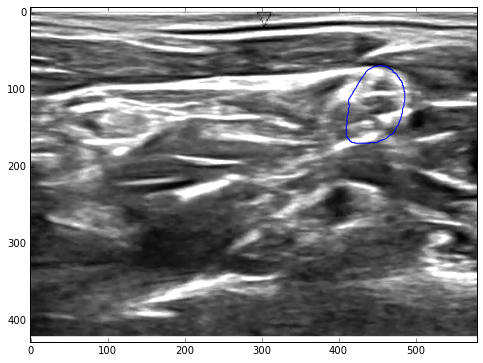

In [17]:
from IPython import display

idx = 6
fig, ax = plt.subplots(figsize=(8,6))

#@interact(idx=IntSlider(min=0, max=len(training)-1, continuous_update=False))
def plot_image(idx):
    im = smp.loadsingle(training.iloc[idx])
    ax.imshow(im, cmap=plt.cm.gray)
    if training['hasmask'].iloc[idx]:
        smp.plot_contour(training.iloc[idx], ax)
    ax.autoscale(True, tight=True)
    
plot_image(idx)

@interact(vmin=IntSlider(min=0,max=255, continuous_update=True), vmax=(0,255))
def update_image(vmin=0, vmax=255):
    ax.images[0].set_clim(vmax=vmax, vmin=vmin)
    display.display(ax.figure)
    
    #display.clear_output(wait=True)
